In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = ResourceWarning)
warnings.filterwarnings('ignore', category = BytesWarning)
warnings.filterwarnings('ignore', category = Warning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

matplotlib.rc('xtick', labelsize = 18)
matplotlib.rc('ytick', labelsize = 18)

In [2]:
import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

In [3]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/34857/status,
Dashboard: /proxy/34857/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45107,Workers: 4
Dashboard: /proxy/34857/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:38873,Total threads: 4
Dashboard: /proxy/44251/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:33445,


In [4]:
db = '/scratch/x77/db6174/mom/archive/databases/025deg_jra55_ryf/cc_database_control.db'
session = cc.database.create_session(db)

expt = '025deg_jra55_ryf_control'

In [5]:
start_time = '2202-01-01'
end_time = '2285-12-31'

start_time_last = '2276-01-01'
end_time_last = end_time

## Heat flux : Individual contributions

In [6]:
dxt = cc.querying.getvar(expt = expt, variable = 'dxt', session = session, frequency = 'static', n = 1)

In [7]:
sw_flx = cc.querying.getvar(expt = expt, session = session, variable = 'swflx', frequency = '1 monthly', 
                          use_cftime = True).sel(time = slice(start_time, end_time))
sw_flx = (sw_flx * dxt).sum(dim = ['xt_ocean']).sel(time = slice(start_time, end_time)).mean('time').load()

In [8]:
lw_flx = cc.querying.getvar(expt = expt, session = session, variable = 'lw_heat', frequency = '1 monthly', 
                          use_cftime = True).sel(time = slice(start_time, end_time))
lw_flx = (lw_flx * dxt).sum(dim = ['xt_ocean']).sel(time = slice(start_time, end_time)).mean('time').load()

In [9]:
latent = cc.querying.getvar(expt = expt, session = session, variable = 'evap_heat', frequency = '1 monthly', 
                          use_cftime = True).sel(time = slice(start_time, end_time))
latent = (latent * dxt).sum(dim = ['xt_ocean']).sel(time = slice(start_time, end_time)).mean('time').load()

In [12]:
sens = cc.querying.getvar(expt = expt, session = session, variable = 'sens_heat', frequency = '1 monthly', 
                          use_cftime = True).sel(time = slice(start_time, end_time))
sens = (sens * dxt).sum(dim = ['xt_ocean']).sel(time = slice(start_time, end_time)).mean('time').load()

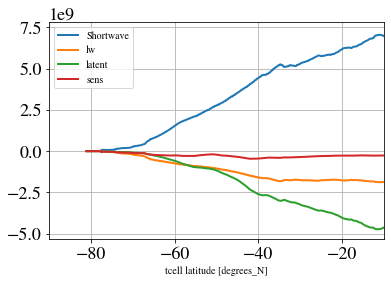

In [13]:
sw_flx.plot(label = 'Shortwave')
lw_flx.plot(label = 'lw')
latent.plot(label = 'latent')
sens.plot(label = 'sens')
plt.xlim([-90, -10])
plt.legend()
plt.grid()

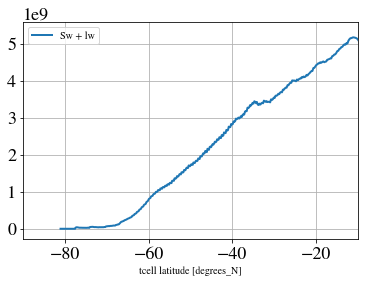

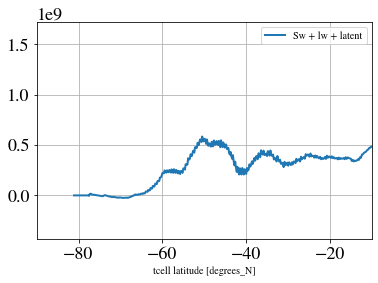

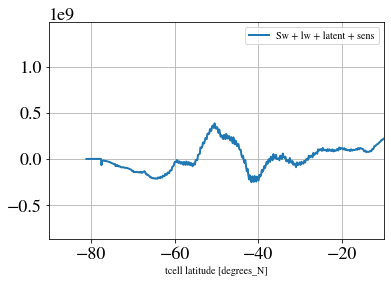

In [14]:
plt.figure()
(sw_flx + lw_flx).plot(label = 'Sw + lw')
plt.xlim([-90, -10])
plt.grid()
plt.legend()

plt.figure()
(sw_flx + lw_flx + latent).plot(label = 'Sw + lw + latent')
plt.xlim([-90, -10])
plt.grid()
plt.legend()

plt.figure()
(sw_flx + lw_flx + latent + sens).plot(label = 'Sw + lw + latent + sens')
plt.xlim([-90, -10])
plt.grid()
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


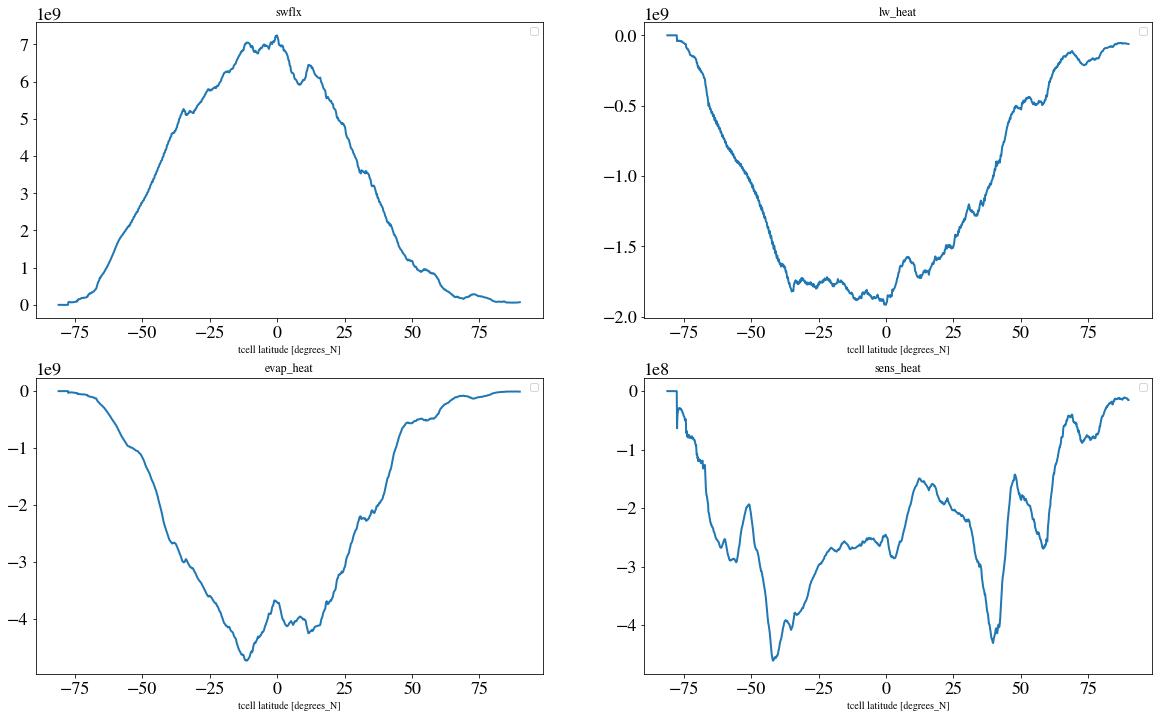

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12))

var_list = ['swflx', 'lw_heat', 'evap_heat', 'sens_heat']
for k, l in enumerate(var_list):
    variable = cc.querying.getvar(expt = expt, session = session, variable = l, frequency = '1 monthly', 
                          use_cftime = True).sel(time = slice(start_time, end_time))
    variable = (variable * dxt).sum(dim = ['xt_ocean'])
    # variable = variable.coarsen({"time": ncoarse}, boundary = "trim").mean()
    variable.sel(time = slice(start_time, end_time)).mean('time').plot(ax = axes[int(k/2)][int(k%2)])
    axes[int(k/2)][int(k%2)].legend()
    axes[int(k/2)][int(k%2)].set_title(var_list[k])